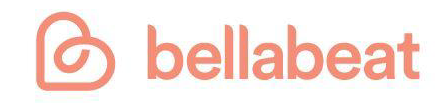

## Bellabeat Case Study in R
### Vishal Dubey
#### February 20, 2023

# Table of Contents
1. [Introduction](#introduction)
2. [Bussiness Task](#business-task)
3. [Data Preparation](#data-preparation)
4. [Data Processing](#data-processing)
5. [Analyze and Visualize](#analyze-and-visualize)
6. [Conclusion](#conclusion)

# Introduction

<font size="4">
Bellabeat is a hightech manufacturer of health focused product for women. Bellabeat deveolps smart wearables and accompaying product that monitor daily activities, daily sleep and stress level that helps women to be aware how their body works and make smart decisions about their health.</font>

# Bussiness Task

**2.1 Questions:**

* What are some trends in smart device usage?
* How could these trends apply to Bellabeat Customers?
* How could these trends help influence Bellabeat marketing strategy?


***2.2 Bussiness Task :***

Analyze smart device usage in order to gain insight into how consumers use Non-Bellabeat smart Devices.
    
    
   
***2.3 Key Stakeholders:***
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* Bellabeat Data analytics team.

**2.4 Products:**
* Bellabeat app
* Leaf
* Time
* Spring
* Bellabeat Membership

I have asked to analyze one of the product. I chose to work for Bellabeat app.

# Data Preparation

**3.1 Data :**
FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set contains personal fitness tracker from **Thirty fitbit users**.

**3.2 Accessiblity and privacy of data :**
This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. 

**3.3 Dataset :**
This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

**3.4 Limitations**
* The data sample is less since it contain only (30 users) so we may encounter sampling bias because it's not represantative of a whole poplution.
* The dataset is not current.
* The dataset is not from Bellabeat so its not orignal
* The Datasets doesn't contain age, gender, health conditions, and lifestyle habits of users.








# Data Processing
* **I am using R here because of the amount of data and its easy to analyze and create effective viz in R and it also helps with documentation.**

**<font size="5"> 4.1 Loading R Libraries</font>**

In [45]:
library(tidyverse)
library(readr)
library(dplyr)
library(ggplot2)
library(skimr)
library('janitor')
library(here)



**4.2 Loading Datasets**

In [46]:
Daily_activity = read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
Daily_sleep = read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
#I will use these datasets for my analysis

In [47]:
head(Daily_activity)
head(Daily_sleep)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


**It seems like many variables are not usefull here so I'll select only important variables.**

**4.4 Removing Unwanted Variables**

In [48]:
df1 = Daily_sleep
df2 = subset(Daily_activity, select= -c(TrackerDistance, LoggedActivitiesDistance, LightActiveDistance, SedentaryActiveDistance))
head(df2)

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,1.88,0.55,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,1.57,0.69,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,2.44,0.40,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,2.14,1.26,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,2.71,0.41,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,3.19,0.78,38,20,164,539,1728


**checking for null values**

In [49]:
sum(is.na(df1))

sum(is.na(df2))

[1] 0

[1] 0

**4.5 Removing Null Values and Duplicate values**

In [50]:
df3 <- df1 %>%
  distinct() %>%
  drop_na()

df4 <- df2 %>%
  distinct() %>%
  drop_na()

In [51]:
head(df3)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


**4.6 Converting Minutes into hours**

It will help me to analyze and visualize data more effectively.

In [52]:
df3['Total_hours_asleep'] = df3['TotalMinutesAsleep'] / 60
df3['Total_hours_in_bed'] = df3['TotalTimeInBed'] / 60
head(df3)
df4['Sedentary_hours'] = df4['SedentaryMinutes'] / 60
df4['Lightly_active_hours'] = df4['LightlyActiveMinutes'] / 60
head(df4)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Total_hours_asleep,Total_hours_in_bed
,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346,5.450000,5.766667
2,1503960366,4/13/2016 12:00:00 AM,2,384,407,6.400000,6.783333
3,1503960366,4/15/2016 12:00:00 AM,1,412,442,6.866667,7.366667
4,1503960366,4/16/2016 12:00:00 AM,2,340,367,5.666667,6.116667
5,1503960366,4/17/2016 12:00:00 AM,1,700,712,11.666667,11.866667
6,1503960366,4/19/2016 12:00:00 AM,1,304,320,5.066667,5.333333


,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Sedentary_hours,Lightly_active_hours
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1503960366,4/12/2016,13162,8.50,1.88,0.55,25,13,328,728,1985,12.133333,5.466667
2,1503960366,4/13/2016,10735,6.97,1.57,0.69,21,19,217,776,1797,12.933333,3.616667
3,1503960366,4/14/2016,10460,6.74,2.44,0.40,30,11,181,1218,1776,20.300000,3.016667
4,1503960366,4/15/2016,9762,6.28,2.14,1.26,29,34,209,726,1745,12.100000,3.483333
5,1503960366,4/16/2016,12669,8.16,2.71,0.41,36,10,221,773,1863,12.883333,3.683333
6,1503960366,4/17/2016,9705,6.48,3.19,0.78,38,20,164,539,1728,8.983333,2.733333


In [53]:
df4['VeryActiveHours'] = df4['VeryActiveMinutes'] / 60
df4['ModerateActiveHours'] = df4['FairlyActiveMinutes'] / 60
head(df4)

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Sedentary_hours,Lightly_active_hours,VeryActiveHours,ModerateActiveHours
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,13162,8.50,1.88,0.55,25,13,328,728,1985,12.133333,5.466667,0.4166667,0.2166667
2,1503960366,4/13/2016,10735,6.97,1.57,0.69,21,19,217,776,1797,12.933333,3.616667,0.3500000,0.3166667
3,1503960366,4/14/2016,10460,6.74,2.44,0.40,30,11,181,1218,1776,20.300000,3.016667,0.5000000,0.1833333
4,1503960366,4/15/2016,9762,6.28,2.14,1.26,29,34,209,726,1745,12.100000,3.483333,0.4833333,0.5666667
5,1503960366,4/16/2016,12669,8.16,2.71,0.41,36,10,221,773,1863,12.883333,3.683333,0.6000000,0.1666667
6,1503960366,4/17/2016,9705,6.48,3.19,0.78,38,20,164,539,1728,8.983333,2.733333,0.6333333,0.3333333


I can safely remove minutes rows

**Removing minutes columns**


In [54]:
df5 = subset(df3, select = -c(TotalTimeInBed, TotalMinutesAsleep))
head(df5)
df4 = subset(df4, select = -c(SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes))
head(df4)


,Id,SleepDay,TotalSleepRecords,Total_hours_asleep,Total_hours_in_bed
,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,1,5.450000,5.766667
2,1503960366,4/13/2016 12:00:00 AM,2,6.400000,6.783333
3,1503960366,4/15/2016 12:00:00 AM,1,6.866667,7.366667
4,1503960366,4/16/2016 12:00:00 AM,2,5.666667,6.116667
5,1503960366,4/17/2016 12:00:00 AM,1,11.666667,11.866667
6,1503960366,4/19/2016 12:00:00 AM,1,5.066667,5.333333


,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,Calories,Sedentary_hours,Lightly_active_hours,VeryActiveHours,ModerateActiveHours
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,13162,8.50,1.88,0.55,1985,12.133333,5.466667,0.4166667,0.2166667
2,1503960366,4/13/2016,10735,6.97,1.57,0.69,1797,12.933333,3.616667,0.3500000,0.3166667
3,1503960366,4/14/2016,10460,6.74,2.44,0.40,1776,20.300000,3.016667,0.5000000,0.1833333
4,1503960366,4/15/2016,9762,6.28,2.14,1.26,1745,12.100000,3.483333,0.4833333,0.5666667
5,1503960366,4/16/2016,12669,8.16,2.71,0.41,1863,12.883333,3.683333,0.6000000,0.1666667
6,1503960366,4/17/2016,9705,6.48,3.19,0.78,1728,8.983333,2.733333,0.6333333,0.3333333


**Finding outliers using Boxplot**

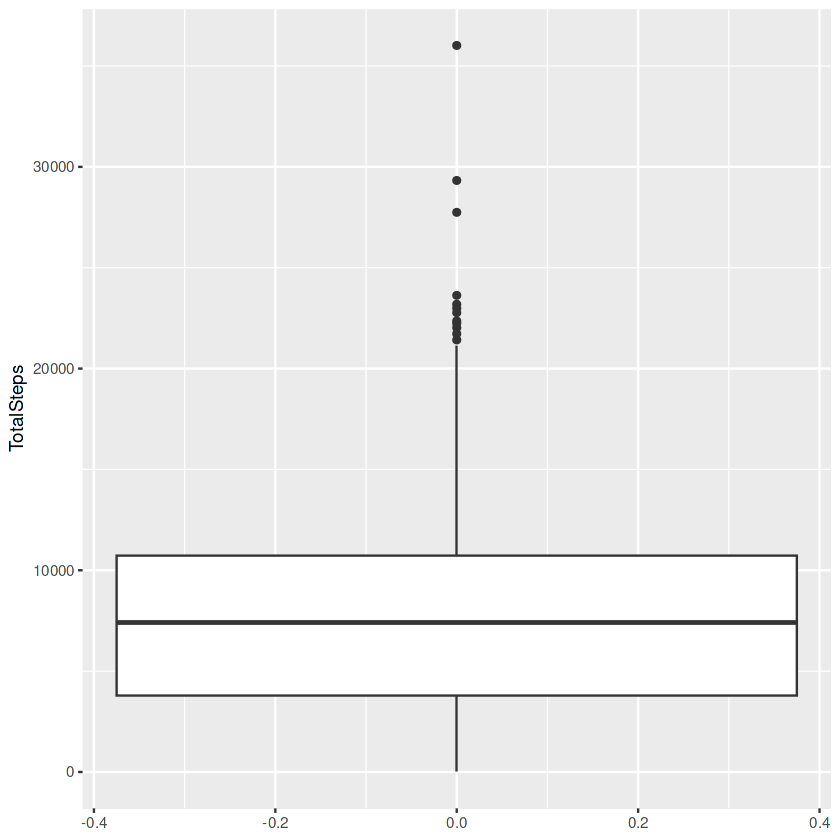

In [55]:
ggplot(df4, aes(y =  TotalSteps)) +
geom_boxplot()


In [56]:
outliers <- boxplot.stats(df4$TotalSteps)$out
print(outliers)

 [1] 36019 22244 22770 22359 22988 22026 23186 29326 23629 27745 21727 21420


**4.7 Removing outliers**

In [57]:
df6 = subset(df4, !(TotalSteps %in% outliers))

**4.8 Changing Date format for constistency of data**

In [58]:
df5 = df5 %>%
mutate(Date = as.POSIXct(SleepDay, format = "%m/%d/%Y", tz = Sys.timezone()))
head(df5)

df6 = df6 %>%
mutate(ActivityDate = as.POSIXct(ActivityDate , format = '%m/%d/%y', tz = Sys.timezone()))
head(df6)

,Id,SleepDay,TotalSleepRecords,Total_hours_asleep,Total_hours_in_bed,Date
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dttm>
1,1503960366,4/12/2016 12:00:00 AM,1,5.450000,5.766667,2016-04-12
2,1503960366,4/13/2016 12:00:00 AM,2,6.400000,6.783333,2016-04-13
3,1503960366,4/15/2016 12:00:00 AM,1,6.866667,7.366667,2016-04-15
4,1503960366,4/16/2016 12:00:00 AM,2,5.666667,6.116667,2016-04-16
5,1503960366,4/17/2016 12:00:00 AM,1,11.666667,11.866667,2016-04-17
6,1503960366,4/19/2016 12:00:00 AM,1,5.066667,5.333333,2016-04-19


,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,Calories,Sedentary_hours,Lightly_active_hours,VeryActiveHours,ModerateActiveHours
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2020-04-12,13162,8.50,1.88,0.55,1985,12.133333,5.466667,0.4166667,0.2166667
2,1503960366,2020-04-13,10735,6.97,1.57,0.69,1797,12.933333,3.616667,0.3500000,0.3166667
3,1503960366,2020-04-14,10460,6.74,2.44,0.40,1776,20.300000,3.016667,0.5000000,0.1833333
4,1503960366,2020-04-15,9762,6.28,2.14,1.26,1745,12.100000,3.483333,0.4833333,0.5666667
5,1503960366,2020-04-16,12669,8.16,2.71,0.41,1863,12.883333,3.683333,0.6000000,0.1666667
6,1503960366,2020-04-17,9705,6.48,3.19,0.78,1728,8.983333,2.733333,0.6333333,0.3333333


**Renaming and cleaning columns and converting all variables into small letter.**

In [59]:
clean_names(df5)
df5 = rename_with(df5, tolower)
clean_names(df6)
df6 = rename_with(df6, tolower)

,id,sleep_day,total_sleep_records,total_hours_asleep,total_hours_in_bed,date
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dttm>
1,1503960366,4/12/2016 12:00:00 AM,1,5.450000,5.766667,2016-04-12
2,1503960366,4/13/2016 12:00:00 AM,2,6.400000,6.783333,2016-04-13
3,1503960366,4/15/2016 12:00:00 AM,1,6.866667,7.366667,2016-04-15
4,1503960366,4/16/2016 12:00:00 AM,2,5.666667,6.116667,2016-04-16
5,1503960366,4/17/2016 12:00:00 AM,1,11.666667,11.866667,2016-04-17
6,1503960366,4/19/2016 12:00:00 AM,1,5.066667,5.333333,2016-04-19
7,1503960366,4/20/2016 12:00:00 AM,1,6.000000,6.283333,2016-04-20
8,1503960366,4/21/2016 12:00:00 AM,1,5.416667,6.066667,2016-04-21
9,1503960366,4/23/2016 12:00:00 AM,1,6.016667,6.400000,2016-04-23


,id,activity_date,total_steps,total_distance,very_active_distance,moderately_active_distance,calories,sedentary_hours,lightly_active_hours,very_active_hours,moderate_active_hours
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2020-04-12,13162,8.50,1.88,0.55,1985,12.133333,5.466667,0.4166667,0.21666667
2,1503960366,2020-04-13,10735,6.97,1.57,0.69,1797,12.933333,3.616667,0.3500000,0.31666667
3,1503960366,2020-04-14,10460,6.74,2.44,0.40,1776,20.300000,3.016667,0.5000000,0.18333333
4,1503960366,2020-04-15,9762,6.28,2.14,1.26,1745,12.100000,3.483333,0.4833333,0.56666667
5,1503960366,2020-04-16,12669,8.16,2.71,0.41,1863,12.883333,3.683333,0.6000000,0.16666667
6,1503960366,2020-04-17,9705,6.48,3.19,0.78,1728,8.983333,2.733333,0.6333333,0.33333333
7,1503960366,2020-04-18,13019,8.59,3.25,0.64,1921,19.150000,3.883333,0.7000000,0.26666667
8,1503960366,2020-04-19,15506,9.88,3.53,1.32,2035,12.916667,4.400000,0.8333333,0.51666667
9,1503960366,2020-04-20,10544,6.68,1.96,0.48,1786,13.633333,3.416667,0.4666667,0.20000000


**4.9 Summarized Processing tasks**

**Here are the some steps I have taken for cleaning and manipulation of data**


* Removed Unwanted Variable that are not relevant.

-> Removed variables : **Id, IsManualReport, LogId** in  Sleep Data.

-> Removed variables : **Id, TrackerDistance, LoggedActivitiesDistance, LightActiveDistance, SedentaryActiveDistance** in Daily Activity Data.

* Removed **Null** values from **Daily Activity Datasets**.
* Converted **Minutes** into **Hours** and **removed minutes columns** in both datasets for better analyzing and for better visuals.
* Removed **Outliers** from Daily Activity Datasets **(Total Steps)** was the variable.
* Changed Date format in all datasets **(month/day/year)** for consistency.




# Analyze and Visualize

**5.1 The meaning of some varibles in our datasets for better understanding**
* Total distance - Distance traveled in kilometer in a day.
* sedentary hours - somewhat Inactive e.g sitting or doing nothing.
* calories - Total estimated calories expenditure in a day.
* sleepday - Date on which the sleep event started
* Total hours sleep - total number hours asleep in a day(Including naps)
* Total hours on bed - Total number hours spent on bed

**5.2 Merging Datasets**

In [60]:
activity_sleep <- merge(df6,df5, by.x = "id", by.y = "id", all = TRUE)
sum(is.na(activity_sleep))

[1] 1100

There are Null values in sleep data Let's remove it

In [61]:
activity_sleep = activity_sleep %>%
drop_na()
sum(is.na(activity_sleep))

[1] 0

In [62]:
head(activity_sleep)

,id,activitydate,totalsteps,totaldistance,veryactivedistance,moderatelyactivedistance,calories,sedentary_hours,lightly_active_hours,veryactivehours,moderateactivehours,sleepday,totalsleeprecords,total_hours_asleep,total_hours_in_bed,date
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dttm>
1,1503960366,2020-04-28,13154,8.53,3.54,1.16,1898,13.03333,3.15,0.8,0.4666667,4/12/2016 12:00:00 AM,1,5.450000,5.766667,2016-04-12
2,1503960366,2020-04-28,13154,8.53,3.54,1.16,1898,13.03333,3.15,0.8,0.4666667,4/13/2016 12:00:00 AM,2,6.400000,6.783333,2016-04-13
3,1503960366,2020-04-28,13154,8.53,3.54,1.16,1898,13.03333,3.15,0.8,0.4666667,4/15/2016 12:00:00 AM,1,6.866667,7.366667,2016-04-15
4,1503960366,2020-04-28,13154,8.53,3.54,1.16,1898,13.03333,3.15,0.8,0.4666667,4/16/2016 12:00:00 AM,2,5.666667,6.116667,2016-04-16
5,1503960366,2020-04-28,13154,8.53,3.54,1.16,1898,13.03333,3.15,0.8,0.4666667,4/17/2016 12:00:00 AM,1,11.666667,11.866667,2016-04-17
6,1503960366,2020-04-28,13154,8.53,3.54,1.16,1898,13.03333,3.15,0.8,0.4666667,4/19/2016 12:00:00 AM,1,5.066667,5.333333,2016-04-19


**finding averages of all variables for find anytrend**

In [63]:
daily_trends <- activity_sleep %>%
  group_by(activitydate) %>%
  summarise(
    average_total_steps = mean(totalsteps),
    average_total_distance = mean(totaldistance),
    average_moderately_distance = mean(moderatelyactivedistance),
    average_total_calories = mean(calories),
    very_active_hours = mean(veryactivehours),
    moderate_hours = mean(moderateactivehours),
    sedentary_hours = mean(sedentary_hours),
    lightly_hours = mean(lightly_active_hours),
    average_total_hours_asleep = mean(total_hours_asleep),
    average_total_hours_in_bed = mean(total_hours_in_bed),
  )
head(daily_trends)

activitydate,average_total_steps,average_total_distance,average_moderately_distance,average_total_calories,very_active_hours,moderate_hours,sedentary_hours,lightly_hours,average_total_hours_asleep,average_total_hours_in_bed
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-04-12,7951.927,5.591098,0.3839024,2365.166,0.4339024,0.1427236,14.88159,2.869837,6.986220,7.641382
2020-04-13,6700.905,4.726561,0.5227073,2233.161,0.3069106,0.2144715,14.25955,2.709024,6.986220,7.641382
2020-04-14,7753.280,5.460073,0.6132683,2391.085,0.4577236,0.2652033,14.00748,3.203496,6.986220,7.641382
2020-04-15,8788.256,6.210024,0.7129268,2421.307,0.3795122,0.2781707,13.29963,3.813659,6.986220,7.641382
2020-04-16,8147.506,5.814481,0.6843291,2383.154,0.4890717,0.2686498,12.75785,3.377932,6.968734,7.620591
2020-04-17,5328.532,3.818951,0.5856829,2138.076,0.3031301,0.2309756,14.59366,2.393659,6.986220,7.641382


In [64]:
summary(activity_sleep)

       id             activitydate                   totalsteps   
 Min.   :1.504e+09   Min.   :2020-04-12 00:00:00   Min.   :    0  
 1st Qu.:3.977e+09   1st Qu.:2020-04-19 00:00:00   1st Qu.: 4631  
 Median :4.703e+09   Median :2020-04-27 00:00:00   Median : 8580  
 Mean   :5.023e+09   Mean   :2020-04-26 15:46:13   Mean   : 8053  
 3rd Qu.:6.962e+09   3rd Qu.:2020-05-04 00:00:00   3rd Qu.:11207  
 Max.   :8.792e+09   Max.   :2020-05-12 00:00:00   Max.   :20669  
 totaldistance   veryactivedistance moderatelyactivedistance    calories   
 Min.   : 0.00   Min.   : 0.000     Min.   :0.0000           Min.   :   0  
 1st Qu.: 3.16   1st Qu.: 0.000     1st Qu.:0.0000           1st Qu.:1776  
 Median : 6.11   Median : 0.490     Median :0.4000           Median :2156  
 Mean   : 5.68   Mean   : 1.369     Mean   :0.7228           Mean   :2318  
 3rd Qu.: 7.88   3rd Qu.: 2.300     3rd Qu.:1.0000           3rd Qu.:2859  
 Max.   :16.24   Max.   :13.260     Max.   :6.4800           Max.   :4900  

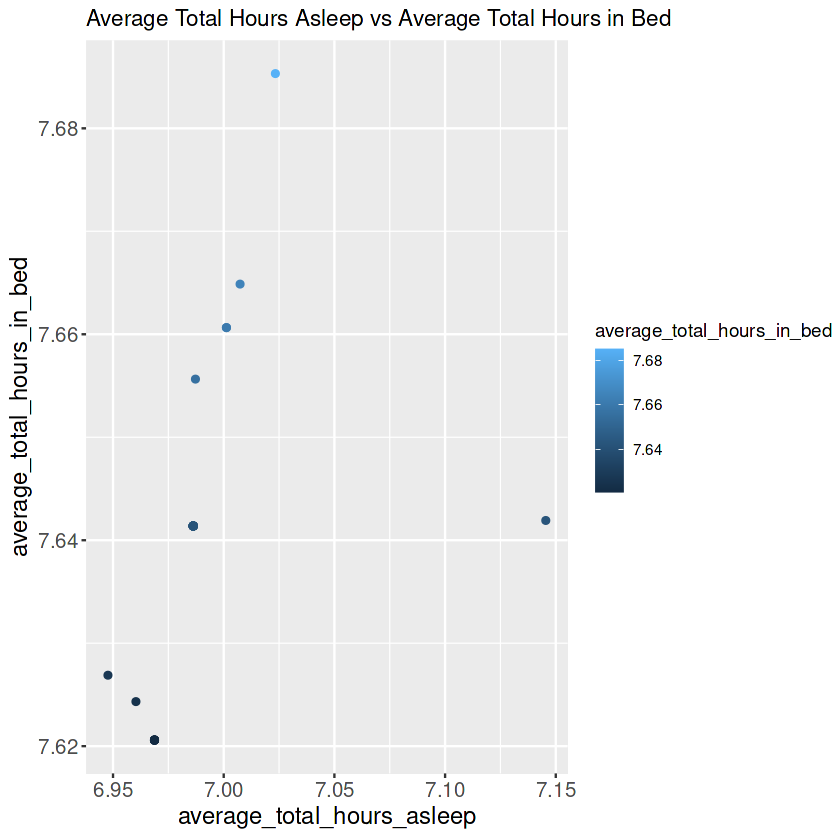

In [65]:
ggplot(data = daily_trends) +
geom_point(mapping = aes(x = average_total_hours_asleep, y = average_total_hours_in_bed, color = average_total_hours_in_bed)) +
labs(title = "Average Total Hours Asleep vs Average Total Hours in Bed") +
theme(axis.text.x = element_text(size = 12), axis.text.y = element_text(size = 12), axis.title.x = element_text(size = 14),axis.title.y = element_text(size = 14))


**5.3 Insights**

-> **It shows that users are spending more time in bed than asleep.**


* **Creating bar chart to compare users activity**

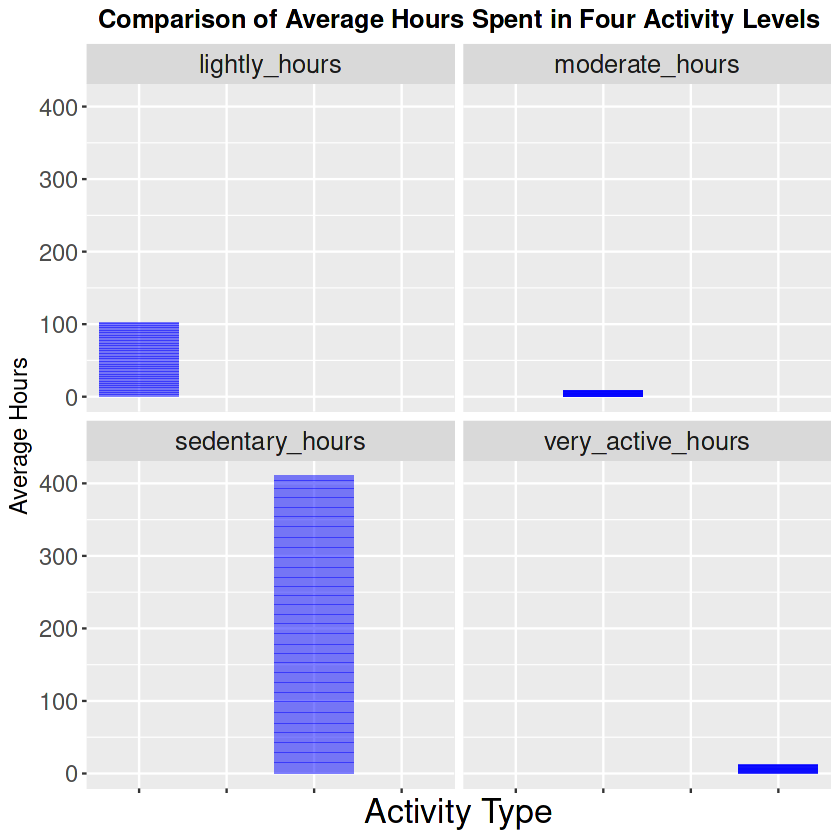

In [66]:
# select the variables to plot
activity <- daily_trends[, c('very_active_hours','moderate_hours', 'sedentary_hours','lightly_hours')]

# reshape the data
activity <- activity %>% gather(activity_type, hours)

# create the plot
ggplot(data = activity, aes(x = activity_type, y = hours)) +
  geom_bar(stat = "identity", fill = 'blue', alpha = 0.5) +
  labs(x = "Activity Type", y = "Average Hours", title = "Comparison of Average Hours Spent in Four Activity Levels") +
theme(strip.text = element_text(size = 15),axis.text.x = element_blank(), axis.text.y = element_text(size = 14), axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 14)) +
 theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5)) +
facet_wrap(~activity_type) 

**5.4 Insights**

-> **It clearly shows that users are not active much! Most of their time spent in sedentary hours (No activities).**

**5.5 Summary of Analysis**
* Insights - Users are spending more time in bed without asleep.
* Users are not involve in daily activities and spending most of their time doing nothing.

# Conclusion

As we have asked to find trend in smart device usage and how to apply those trends in bellabeat application. Here are some conclusion I got.

1. As per first insight.
   Users are spending more time bed in without sleeping! For that we can take following steps:-

**Steps to take :-**
* **We can make sleep schedule for users and remind them by notification from our Bellabeat application.**
* **We can add sleeping music and quickly sleeping tips for our users for their better sleep and it will also increase traffic in our application because  they will spend more time in our application for these activities.**

2. As per second insight.
  Users are not active much! Most of their time spent in sedentary hours (No activities).
  
  
  **Steps to take :-**

* **Provide incentives: Offer incentives or rewards to users who are actively engaging with the application. This can help motivate users to use the application more frequently.**
​
* **Provide educational resources: Provide educational resources on the importance of physical activity and the risks associated with a sedentary lifestyle. This can be done through in-app notifications, newsletters, and blog posts.**
​
* **Gamify physical activity: Gamify physical activity by offering challenges, rewards, and competitions to incentivize users to be more active. This can help make physical activity more engaging and fun for users.**
​
* **Marketing : Create marketing materials based on importance of physical activities and risk of not doing activities. This can help raise awareness among users to be active.**
  
  
